In [36]:
import cirq 
from cirq.circuits import *
from typing import Tuple
from qiskit import QuantumCircuit, execute, Aer, assemble
import numpy as np
from qiskit import *
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
%matplotlib inline
import pandas
from qiskit.tools.monitor import job_monitor
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute


In [37]:


#Use Aer's qasm_simulator
simulator = QasmSimulator()

In [58]:
## FULL ADDER

qfa = QuantumRegister(5, 'qfa')
cfa =  ClassicalRegister(2, 'cfa')

full_adder = QuantumCircuit(qfa, cfa)


full_adder.h([0,1,2])

full_adder.x(qfa[0])
#full_adder.x(qfa[1])
full_adder.cx(qfa[0],qfa[3])
full_adder.cx(qfa[1],qfa[3])
full_adder.cx(qfa[2],qfa[3])
full_adder.ccx(qfa[0],qfa[1],qfa[4])
full_adder.ccx(qfa[0],qfa[2],qfa[4])
full_adder.ccx(qfa[1],qfa[2],qfa[4])
full_adder.measure([3,4], [0,1])

full_adder.draw()

┌───┐┌───┐                                    
qfa_0: ┤ H ├┤ X ├──■──────────────■────■─────────────
       ├───┤└───┘  │              │    │             
qfa_1: ┤ H ├───────┼────■─────────■────┼───────■─────
       ├───┤       │    │         │    │       │     
qfa_2: ┤ H ├───────┼────┼────■────┼────■───────■─────
       └───┘     ┌─┴─┐┌─┴─┐┌─┴─┐  │    │  ┌─┐  │     
qfa_3: ──────────┤ X ├┤ X ├┤ X ├──┼────┼──┤M├──┼─────
                 └───┘└───┘└───┘┌─┴─┐┌─┴─┐└╥┘┌─┴─┐┌─┐
qfa_4: ─────────────────────────┤ X ├┤ X ├─╫─┤ X ├┤M├
                                └───┘└───┘ ║ └───┘└╥┘
cfa: 2/════════════════════════════════════╩═══════╩═
                                           0       1

Job Status: job has successfully run
RESULT:  {'11': 7, '10': 35, '00': 17, '01': 41} 



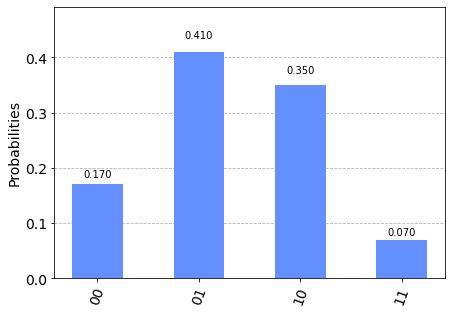

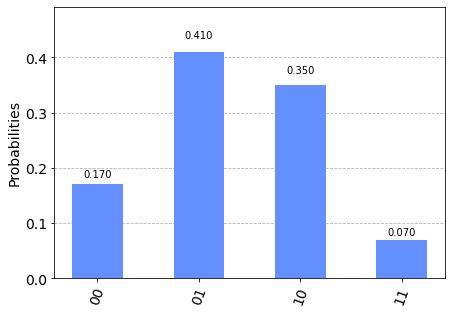

In [63]:
backend_sim = Aer.get_backend('qasm_simulator')
sim = execute(full_adder, backend_sim, shots=100)
job_monitor(sim)
sim_result = sim.result()
counts = sim_result.get_counts(full_adder)
print('RESULT: ',counts,'\n')
plot_histogram(counts)

